# **Question:** When should we go out for exercise?

Download pm25.csv from https://drive.google.com/file/d/1Ry1GuKrCho_VpUT2jAkNjhrqfQo2qp_B/view

Upload `pm25.csv` as runtime file to Collab session storage. This runtime file will be erased when runtime is terminated.

Explore pandas library API at [link text](https://pandas.pydata.org/docs/reference/index.html#api).


## Data Loading
**`read_csv`** Read a comma-separated values (csv) file into `DataFrame`. Giving filepath or URL.
Frequently used optional parameters
*   `sep` : Character or regex pattern to treat as the delimiter. Default ','
*   `header` : Value representing the heading row. Possible values include `int` (e.g. `header=0`), Sequence of `int`, `'infer'` or `'None'`. Default value is `'infer'` which infer the column names, which is from the first line of the file.

**`DataFrame`** is primary pandas data structure, as two-dimensional, size-mutable, potentially heterogeneous tabular data. It contains labeled axes (rows and columns). Arithmetic operations align on both row and column labels.


In [107]:
# Read CSV and convert to df
import pandas as pd
df = pd.read_csv('pm25.csv', header=None)

**`DataFrame.head(n=5)`** returns the first `n` rows for the object based on position.
*   `n` : Number of rows to return. Default is 5




In [108]:
df.head()

,0,1
0,2018-12-01 00:00:00,42
1,2018-12-01 01:00:00,44
2,2018-12-01 02:00:00,38
3,2018-12-01 03:00:00,40
4,2018-12-01 04:00:00,38


**`DataFrame.columns`** = column labels of the DataFrame

In [109]:
# Select only 2 columns
df.columns = ['dt','pm']
df.columns

Index(['dt', 'pm'], dtype='object')

In [110]:
df.head()

,dt,pm
0,2018-12-01 00:00:00,42
1,2018-12-01 01:00:00,44
2,2018-12-01 02:00:00,38
3,2018-12-01 03:00:00,40
4,2018-12-01 04:00:00,38


## Data Series
Extract data series from data frame.

Use `dataFrame.label` or `dataFrame['label']`to access data series of corresponding column label.

In [111]:
# Select df by labels
dt = df['dt']
pm = df['pm']
print(dt)
print(pm)

0       2018-12-01 00:00:00
1       2018-12-01 01:00:00
2       2018-12-01 02:00:00
3       2018-12-01 03:00:00
4       2018-12-01 04:00:00
               ...         
1309    2019-01-24 13:00:00
1310    2019-01-24 14:00:00
1311    2019-01-24 15:00:00
1312    2019-01-24 16:00:00
1313    2019-01-24 17:00:00
Name: dt, Length: 1314, dtype: object
0       42
1       44
2       38
3       40
4       38
        ..
1309     -
1310     -
1311     -
1312     -
1313     -
Name: pm, Length: 1314, dtype: object


Slice the data for only those that match the given condition. The result is a data frame.

In [112]:
df[df.pm!='-']

,dt,pm
0,2018-12-01 00:00:00,42
1,2018-12-01 01:00:00,44
2,2018-12-01 02:00:00,38
3,2018-12-01 03:00:00,40
4,2018-12-01 04:00:00,38
...,...,...
1304,2019-01-24 08:00:00,46
1305,2019-01-24 09:00:00,46
1306,2019-01-24 10:00:00,40
1307,2019-01-24 11:00:00,40


In [113]:
df.dtypes

,0
dt,object
pm,object


Original data types for both dt and pm columns are String.

**`pandas.to_datetime(arg)`** converts argument to datetime.

*   `dayfirst`: `bool`, If `True`, parses dates with the day first (default is `False`)
*   `yearfirst` : `bool`, If `True`, parses dates with the year first (default `False`)




In [114]:
# Converts the data series of dt to a date time object
df.dt = pd.to_datetime(df.dt)
df.dtypes

,0
dt,datetime64[ns]
pm,object


Create a new data frame `filtered_df` that stores sliced data from `df` for only those with `pm!='-'`

In [115]:
# Create a new df with pm != '-'
filtered_df = df[df.pm!='-']
filtered_df

,dt,pm
0,2018-12-01 00:00:00,42
1,2018-12-01 01:00:00,44
2,2018-12-01 02:00:00,38
3,2018-12-01 03:00:00,40
4,2018-12-01 04:00:00,38
...,...,...
1304,2019-01-24 08:00:00,46
1305,2019-01-24 09:00:00,46
1306,2019-01-24 10:00:00,40
1307,2019-01-24 11:00:00,40


**`pandas.to_numeric(arg)`** convert argument to a numeric type. The default return dtype is `float64` or `int64` depending on the data supplied.

In [116]:
# Convert pm to numeric values and reassign it

# Recommended to use .loc instead
filtered_df.pm = pd.to_numeric(filtered_df.pm)

# Specify the exact position to replace values
# filtered_df.loc[:,'pm']=pd.to_numeric(filtered_df.pm)

filtered_df.dtypes

<ipython-input-116-4a987017aacf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.pm = pd.to_numeric(filtered_df.pm)


,0
dt,datetime64[ns]
pm,int64


**`.dt`** **accessor** in pandas briefly and clearly returns datetime like properties for the values of the series, if it is a datetime/period like Series.

You may obtain the `year`, `month`, `day`, `dayofweek`, `hour`, `minute`, `second` components of the ISO year.


In [117]:
# Access hour of dt value and assign it to new column called "hr"
# filtered_df['hr'] = filtered_df['dt'].dt.hour
filtered_df.loc[:,'hr'] = filtered_df['dt'].dt.hour

filtered_df.head()

<ipython-input-117-17ca3219588f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.loc[:,'hr'] = filtered_df['dt'].dt.hour


,dt,pm,hr
0,2018-12-01 00:00:00,42,0
1,2018-12-01 01:00:00,44,1
2,2018-12-01 02:00:00,38,2
3,2018-12-01 03:00:00,40,3
4,2018-12-01 04:00:00,38,4


## Visualize Data Using Pandas
**`Series.plot(*args, **kwargs)`** or **`DataFrame.plot(*args, **kwargs)`** makes plots of Series or DataFrame
*   `figsize` : tuple (`width`, `height`) in inches
*   `title` : Title to use for the plot.
*   `xlabel` : Name to use for the xlabel on x-axis. Default uses index name.
*   `ylabel` : Name to use for the ylabel on y-axis. Default shows no ylabel.
*   `x` : label or position. Only used if data is a DataFrame.
*   `y` : label, position or list of label, positions. Allows plotting of one column versus another. Only used if data is a DataFrame.
*   `y` : Name to use for the ylabel on y-axis. Default shows no ylabel.
*   `**kwargs` : Options to pass to matplotlib plotting method



<Axes: >

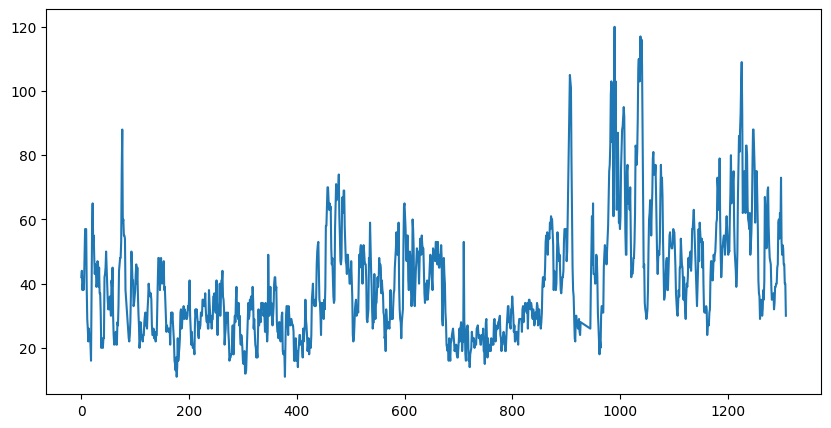

In [118]:
filtered_df.pm.plot(figsize=(10,5))

**`DataFrame.set_index(keys, *, drop=True, append=False, inplace=False, verify_integrity=False)`** set the DataFrame index (row labels) using one or more existing columns or arrays (of the correct length). The index can replace the existing index or expand on it.
*   `keys` : either a single column key (label), a single array of the same length as the calling DataFrame, or a list containing an arbitrary combination of column keys and arrays
*   `drop` : If `True`, delete columns to be used as the new index. Default is `True`.
*   `append` : If `True`, append columns to existing index. Default is `False`.
*   `inplace` : If `True`, modify the DataFrame rather than creating a new one. Default is `False`.
*   `verify_integrity` : If `True`, check the new index for duplicates. Otherwise defer the check until necessary. Default is `False`.



In [119]:
filtered_df.set_index('dt')

,pm,hr
dt,,
2018-12-01 00:00:00,42,0
2018-12-01 01:00:00,44,1
2018-12-01 02:00:00,38,2
2018-12-01 03:00:00,40,3
2018-12-01 04:00:00,38,4
...,...,...
2019-01-24 08:00:00,46,8
2019-01-24 09:00:00,46,9
2019-01-24 10:00:00,40,10


<Axes: title={'center': 'PM 2.5 by Date'}, xlabel='Date', ylabel='PM 2.5'>

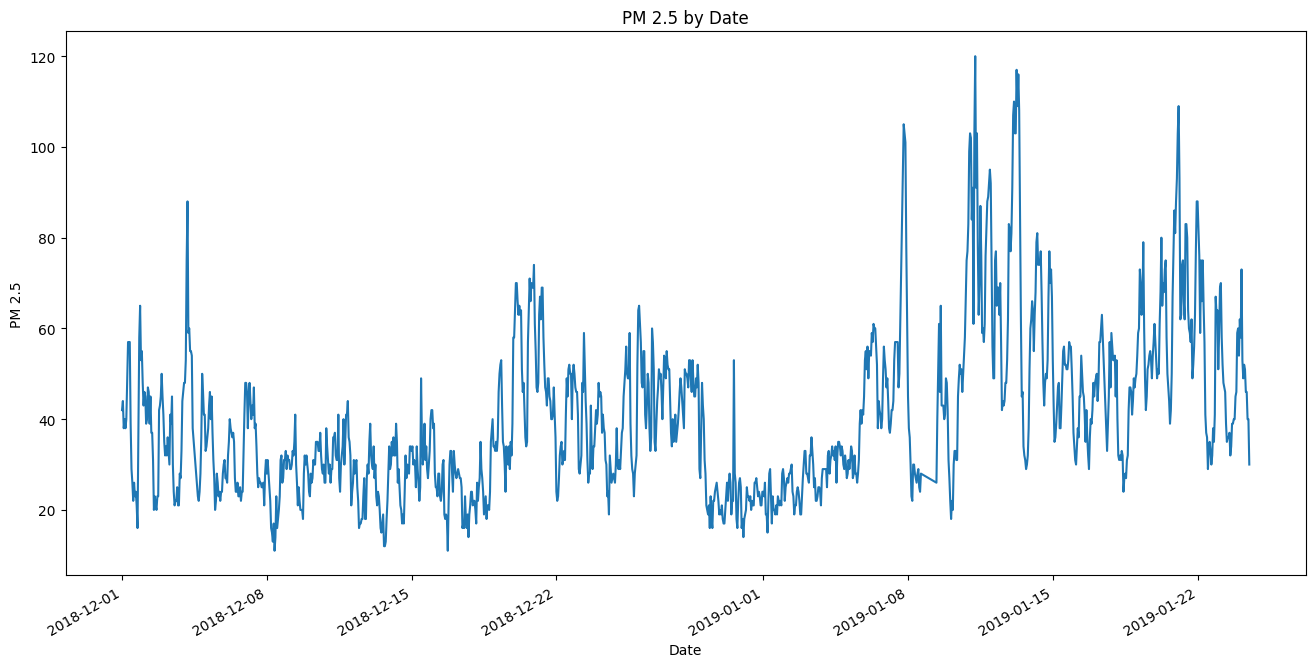

In [120]:
filtered_df.set_index('dt')['pm'].plot(figsize=(16,8),
                                       title='PM 2.5 by Date',
                                       xlabel="Date",
                                       ylabel="PM 2.5")

**`Series.hist(by=None, ax=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, figsize=None, bins=10, backend=None, legend=False, **kwargs)`** draws histogram of the input series using matplotlib, Grouping data into "bins" of equal width for specified number of bins. Bar length represents data points are in that bin.

*   `bins` : Number of histogram bins to be used.
*   List item



<Axes: >

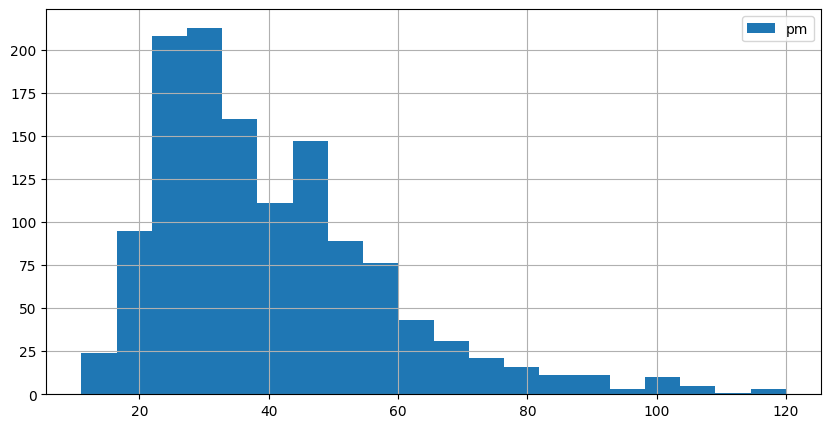

In [121]:
filtered_df['pm'].hist(bins=20,
                       figsize=(10,5),
                       legend=True)

**`pandas.DataFrame.groupby()`** and **`pandas.Series.groupby()`** creates `DataFrameGroupBy` object.

<Axes: xlabel='Hour', ylabel='PM 2.5'>

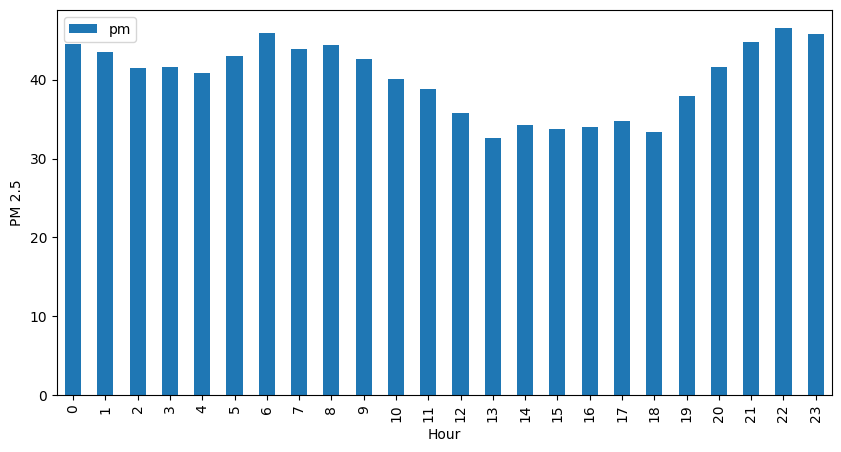

In [122]:
filtered_df.set_index('dt',inplace=True)
filtered_df.groupby('hr').mean().plot(kind='bar',
                                      figsize=(10,5),
                                      xlabel='Hour',
                                      ylabel='PM 2.5',)

**`Series.apply(func, convert_dtype=<no_default>, args=(), *, by_row='compat', **kwargs)`** invokes function on values of Series. It can be `ufunc` (a NumPy function that applies to the entire Series) or a Python function that only works on single values.
*   `func` : Python function or NumPy ufunc to apply
*   `args` : tuple of positional arguments passed to func after the series value.



In [123]:
def assign_colour(pm):
  if pm<=35:
    return 'green'
  elif pm<=40:
    return 'yellow'
  elif pm<=45:
    return 'orange'
  return 'red'

# Apply the function:
# filtered_df.groupby('hr').mean()['pm']
c = [assign_colour(pm) for pm in filtered_df.groupby('hr').mean()['pm']]
c

['orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'red',
 'orange',
 'orange',
 'orange',
 'orange',
 'yellow',
 'yellow',
 'green',
 'green',
 'green',
 'green',
 'green',
 'green',
 'yellow',
 'orange',
 'orange',
 'red',
 'red']

<Axes: xlabel='hr'>

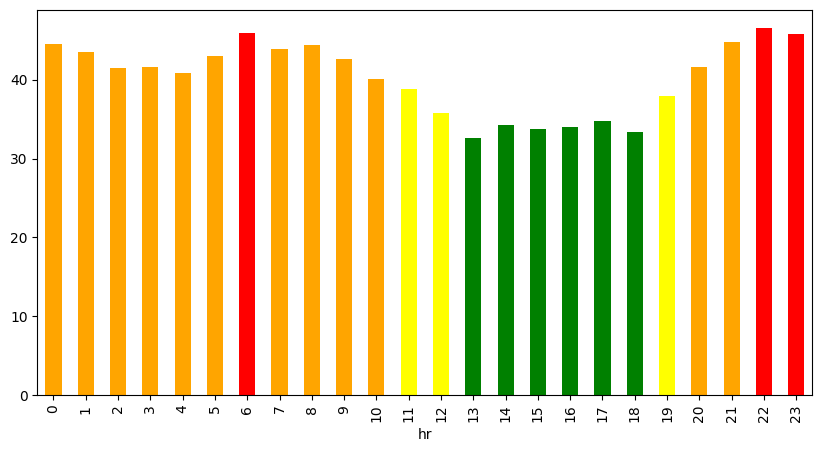

In [124]:
filtered_df.groupby('hr').mean()['pm'].plot(kind='bar', figsize=(10,5), color=c)

In [125]:
filtered_df['condition'] = filtered_df['pm'].apply(assign_colour)

<ipython-input-125-a1d43d574586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['condition'] = filtered_df['pm'].apply(assign_colour)


**`pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=<no_default>, sort=True)`** creates a spreadsheet-style pivot table as a DataFrame. The levels in the pivot table will be stored in MultiIndex objects (hierarchical indexes) on the index and columns of the result DataFrame.
*   `data` : DataFrame
*   `index` : Keys to group by on the pivot table index (column, Grouper, array, or list of the previous).
*   `columns` : Keys to group by on the pivot table column (column, Grouper, array, or list of the previous).
*   `aggfunc` : Aggregation function. If a dict is passed, the key is column to aggregate and the value is function or list of functions. If a list of functions is passed, the resulting pivot table will have hierarchical columns whose top level are the function names.



In [126]:
pd.pivot_table(filtered_df,
               index='hr',
               columns='condition',
               aggfunc='count')['pm']

condition,green,orange,red,yellow
hr,,,,
0,21,7,23,3
1,25,6,21,2
2,27,3,19,5
3,26,3,17,8
4,27,2,17,8
5,23,4,19,8
6,22,3,24,5
7,23,4,23,4
8,22,4,22,6


<Axes: xlabel='hr'>

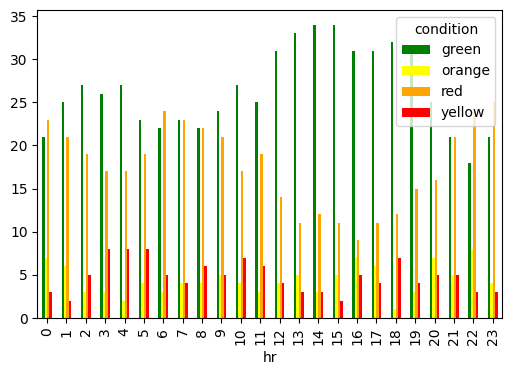

In [128]:
pd.pivot_table(filtered_df, index='hr', columns='condition', aggfunc='count')['pm'].plot(kind='bar',
                                                                                         figsize=(6,4),
                                                                                         color=['green','yellow','orange','red'])